In [1]:
import pandas as pd
import json

# Load main dataset
df = pd.read_csv("IN_youtube_trending_data.csv",encoding="latin1")

# Load category mapping
with open ("IN_category_id.json") as f:
    categories = json.load(f)

# Quick checks
print("Shape of dataset:", df.shape) # rows and column
print("\nFirst 5 rows of dataset:")
print(df.head())

print("\nCategory mapping keys:")
print(categories.keys())

Shape of dataset: (251277, 16)

First 5 rows of dataset:
      video_id                                              title  \
0  Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1  x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2  KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3  UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4  WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   

            publishedAt                 channelId    channelTitle  categoryId  \
0  2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA    FoxStarHindi          24   
1  2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g  Rehaan Records          10   
2  2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg  Diljit Dosanjh          10   
3  2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA        T-Series          10   
4  2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   VYRLOriginals          10   

          trending_date                  

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = "DejaVu Sans"

In [3]:
# Extract category id -> name mapping
import json

with open("IN_category_id.json","r",encoding="utf-8") as f:
    data = json.load(f)
category_mapping = {}
for item in categories["items"]:
    category_mapping[int(item["id"])] = item["snippet"]["title"]

print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [4]:
#Create new column "category_name" in df
df["category_name"] = df["categoryId"].map(category_mapping)

# check first 5 rows again
print(df[["title","categoryId","category_name"]].head())

                                               title  categoryId  \
0  Sadak 2 | Official Trailer | Sanjay | Pooja | ...          24   
1  Kya Baat Aa : Karan Aujla (Official Video) Tan...          10   
2  Diljit Dosanjh: CLASH (Official) Music Video |...          10   
3  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...          10   
4  Baarish (Official Video) Payal Dev,Stebin Ben ...          10   

   category_name  
0  Entertainment  
1          Music  
2          Music  
3          Music  
4          Music  


In [5]:
print(df.columns)

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'category_name'],
      dtype='object')


In [6]:
# Data cleaning for Youtube Trending Dataset
# 1.Check missing values

print("Missing values before cleaning:\n",
      df.isnull().sum())
      

Missing values before cleaning:
 video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          19455
category_name           90
dtype: int64


In [7]:
# Drop irrelevent columns
df = df.drop(columns=["thumbnail_link","description","comments_disabled","ratings_disabled"],errors="ignore")
print("Remaining columns:",df.columns)

Remaining columns: Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'category_name'],
      dtype='object')


In [8]:
# Drop rows where channelTitle is missing (only 1 row)
df = df.dropna(subset=["channelTitle"])

# Fill missing Category_name with "Unknown"
df["category_name"] = df["category_name"].fillna("Unknown")

# Check again after cleaning
print("Missing values after cleaning:\n")
print(df.isnull().sum())

Missing values after cleaning:

video_id         0
title            0
publishedAt      0
channelId        0
channelTitle     0
categoryId       0
trending_date    0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64


In [10]:
# 2.Remove Duplicates

# Check how many duplicates
print("Duplicates before cleaning:")
print(df.duplicated().sum())

Duplicates before cleaning:
75


In [11]:
# Remove duplicates rows based on video_id 
df = df.drop_duplicates(subset=["video_id"])

# Check again
print("Duplicates after cleaning:",df.duplicated().sum())
print("Shape after removing duplicates:",df.shape)

Duplicates after cleaning: 0
Shape after removing duplicates: (78847, 13)


In [12]:
# Convert publish_time column to datetime format

df["publishedAt"] = pd.to_datetime(df["publishedAt"],errors="coerce")

# Extract useful features (day,month,year,hour,day of week)
df["publish_day"] = df["publishedAt"].dt.day_name()
df["publish_hour"] = df["publishedAt"].dt.hour
df["publish_month"] = df["publishedAt"].dt.month_name()

In [13]:
# Remove duplicates by video_id,keeping the latest entry
unique_videos = df.drop_duplicates(subset="video_id",keep="last")

In [14]:
# Exploratory Data Analysis (EDA)

# Dataset Shape
print("Dataset shape:",df.shape)

# Dataset Info
print("\nDataset Info:")
print(df.info())

Dataset shape: (78847, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 78847 entries, 0 to 251267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   video_id       78847 non-null  object             
 1   title          78847 non-null  object             
 2   publishedAt    78847 non-null  datetime64[ns, UTC]
 3   channelId      78847 non-null  object             
 4   channelTitle   78847 non-null  object             
 5   categoryId     78847 non-null  int64              
 6   trending_date  78847 non-null  object             
 7   tags           78847 non-null  object             
 8   view_count     78847 non-null  int64              
 9   likes          78847 non-null  int64              
 10  dislikes       78847 non-null  int64              
 11  comment_count  78847 non-null  int64              
 12  category_name  78847 non-null  object             
 13  publish_

In [9]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include="all").transpose())


Summary Statistics:
                  count unique                       top   freq  \
video_id         251276  78847               y_RHQ4mBDKA     19   
title            251276  79952            Kundali Bhagya     55   
publishedAt      251276  78160      2021-06-04T18:15:01Z     20   
channelId        251276   4521  UCvrhwpnp2DHYQ1CbXby9ypQ   3396   
channelTitle     251276   4802          Vijay Television   3396   
categoryId     251276.0    NaN                       NaN    NaN   
trending_date    251276   1323      2021-03-02T00:00:00Z    398   
tags             251276  49787                    [None]  43717   
view_count     251276.0    NaN                       NaN    NaN   
likes          251276.0    NaN                       NaN    NaN   
dislikes       251276.0    NaN                       NaN    NaN   
comment_count  251276.0    NaN                       NaN    NaN   
category_name    251276     15             Entertainment  98264   

                         mean           

In [15]:
# Check Unique Categories
print("\nCategories in the dataset:")
print(df["categoryId"].value_counts())


Categories in the dataset:
categoryId
24    33798
22    12744
10     8012
23     4750
20     4651
25     2675
28     2477
26     2428
17     2403
27     2172
1      1607
19      577
2       497
15       30
29       26
Name: count, dtype: int64


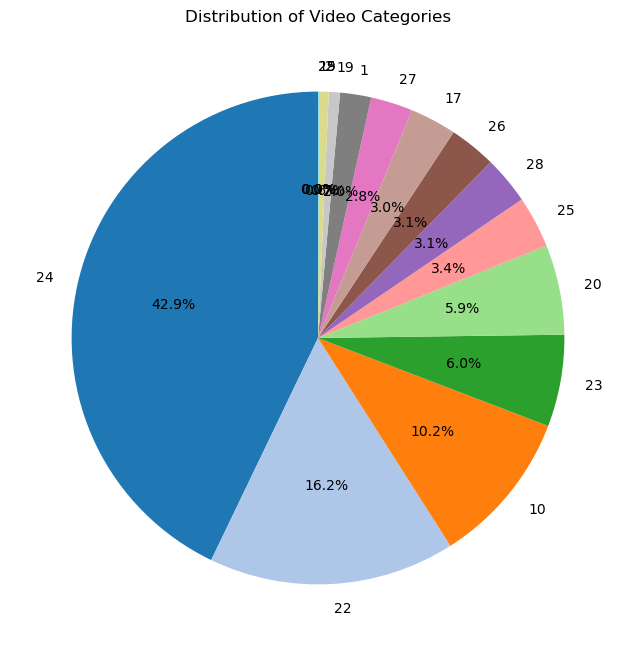

In [16]:
# Distribution of categories (Pie Chart)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
df["categoryId"].value_counts().plot.pie(autopct="%1.1f%%",startangle=90,cmap="tab20")
plt.title("Distribution of Video Categories")
plt.ylabel("")     # to remove default ylabel
plt.show()

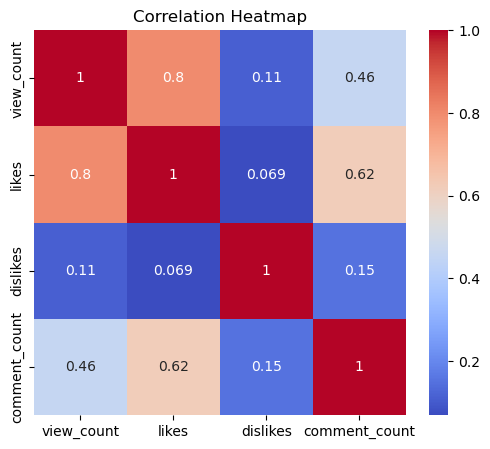

In [48]:
# Correlation heatmap (numerical columns only)
import seaborn as sns

# Select columns
columns = ["view_count", "likes", "dislikes", "comment_count"]
corr = df[columns].corr()

#Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap="coolwarm") # annot=True shoes numbers
plt.title("Correlation Heatmap")
plt.show()

channelTitle
T-Series              26997737316
MrBeast               15748817791
Sourav Joshi Vlogs    11761288222
HAR PAL GEO           11403761002
BLACKPINK              8739144105
ARY Digital HD         8293526826
Zee Music Company      8092466759
HYBE LABELS            7392670685
Vijay Television       7384835859
Dushyant kukreja       6517705756
Name: view_count, dtype: int64


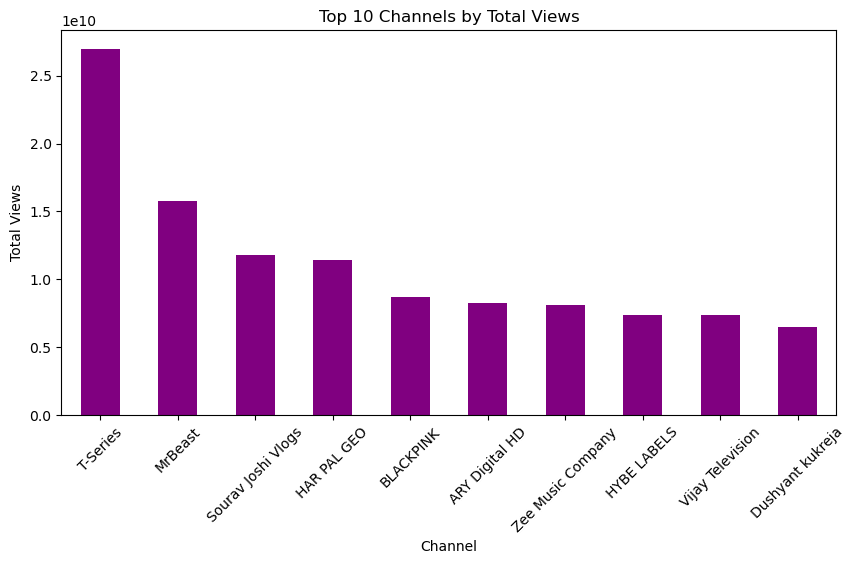

In [12]:
# Top 10 Channels by Total Views

# Group by channel and sum views
top_channels = df.groupby("channelTitle")["view_count"].sum().sort_values(ascending=False).head(10)

# Display
print(top_channels)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
top_channels.plot(kind="bar",color="purple")
plt.title("Top 10 Channels by Total Views")
plt.ylabel("Total Views")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.show()

                                                    title    channelTitle  \
228621                      Grand Theft Auto VI Trailer 1  Rockstar Games   
51371          BTS (ë°©íìëë¨) 'Butter' Official MV     HYBE LABELS   
1676         BTS (ë°©íìëë¨) 'Dynamite' Official MV  Big Hit Labels   
3065      BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V       BLACKPINK   
18789    BTS (ë°©íìëë¨) 'Life Goes On' Official MV  Big Hit Labels   
9812               BLACKPINK â âLovesick Girlsâ M/V       BLACKPINK   
51877   BTS (ë°©íìëë¨) 'Butter' Official MV (Ho...     HYBE LABELS   
62471   BTS (ë°©íìëë¨) 'Permission to Dance' Of...     HYBE LABELS   
42961        BTS (ë°©íìëë¨) 'Film out' Official MV     HYBE LABELS   
223622                        I Built 100 Wells In Africa         MrBeast   

          likes  
228621  9203073  
51371   7110166  
1676    7046197  
3065    5913017  
18789   5178144  
9812    4746462  
51877   4731050  
62471   

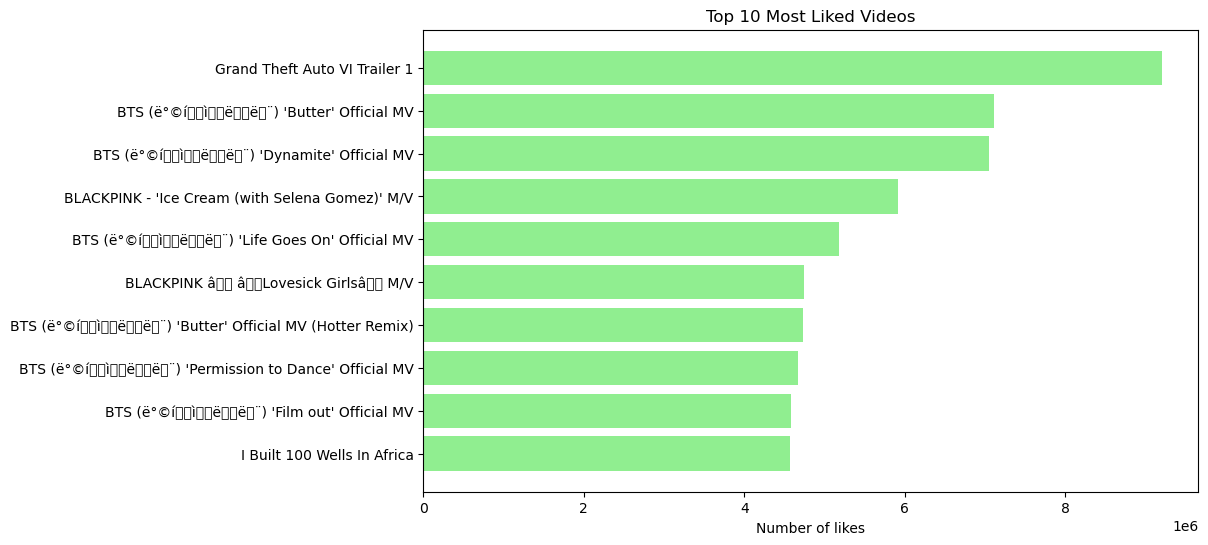

In [17]:
# Top 10 Most Liked Videos

# Sort dataset by likes
top_liked = unique_videos.sort_values("likes",ascending=False).head(10)

# Display
print(top_liked[["title","channelTitle","likes"]])

# Visualization
plt.figure(figsize=(10,6))
plt.barh(top_liked["title"][:10],top_liked["likes"][:10],color="lightgreen")
plt.xlabel("Number of likes")
plt.title("Top 10 Most Liked Videos")
plt.gca().invert_yaxis()
plt.show()

                                                   title  \
0      Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
3852   Prime Minister Narendra Modi's Mann Ki Baat wi...   
3065     BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
2274   Khaali Peeli | Teaser | Ishaan | Ananya Panday...   
1622   Ishq Kamaal â Sadak 2 | Javed Ali | Suniljee...   
5354   Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...   
1676        BTS (ë°©íìëë¨) 'Dynamite' Official MV   
170    DOCTOR (Official Video) Sidhu Moose Wala | Kid...   
88996      Papa baccho k liye Hamesha jinda hai ðð   
27452                              Free Fire BEKAR HAI ?   

                 channelTitle  dislikes  
0                FoxStarHindi   3979409  
3852   Bharatiya Janata Party    968263  
3065                BLACKPINK    405369  
2274              Zee Studios    355820  
1622         Sony Music India    259113  
5354       Desi Music Factory    251581  
1676           Big Hit Labels    165439  
170

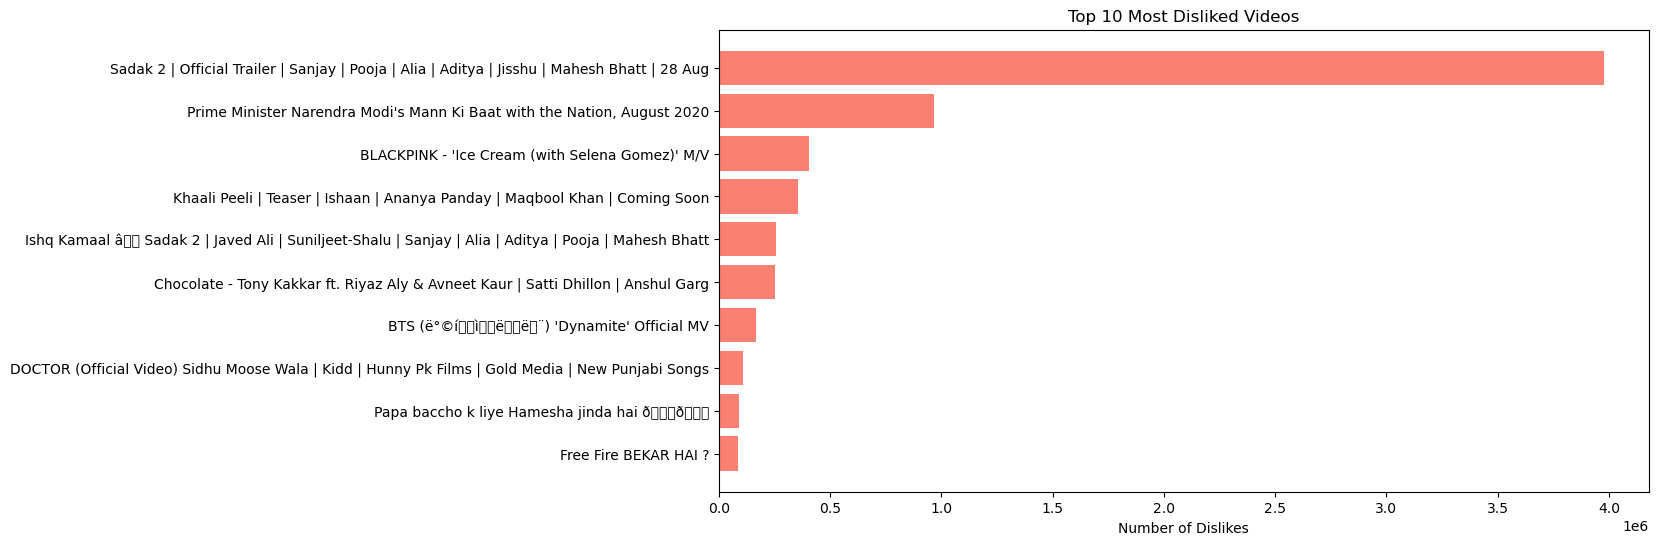

In [18]:
# Top 10 Most disliked Videos

# Sort dataset by dislikes
top_disliked = unique_videos.sort_values("dislikes",ascending=False).head(10)

# Display
print(top_disliked[["title","channelTitle","dislikes"]])

# Visualization
plt.figure(figsize=(12,6))
plt.barh(top_disliked["title"][:10],top_disliked["dislikes"][:10],color="salmon")
plt.xlabel("Number of Dislikes")
plt.title("Top 10 Most Disliked Videos")
plt.gca().invert_yaxis()
plt.show()

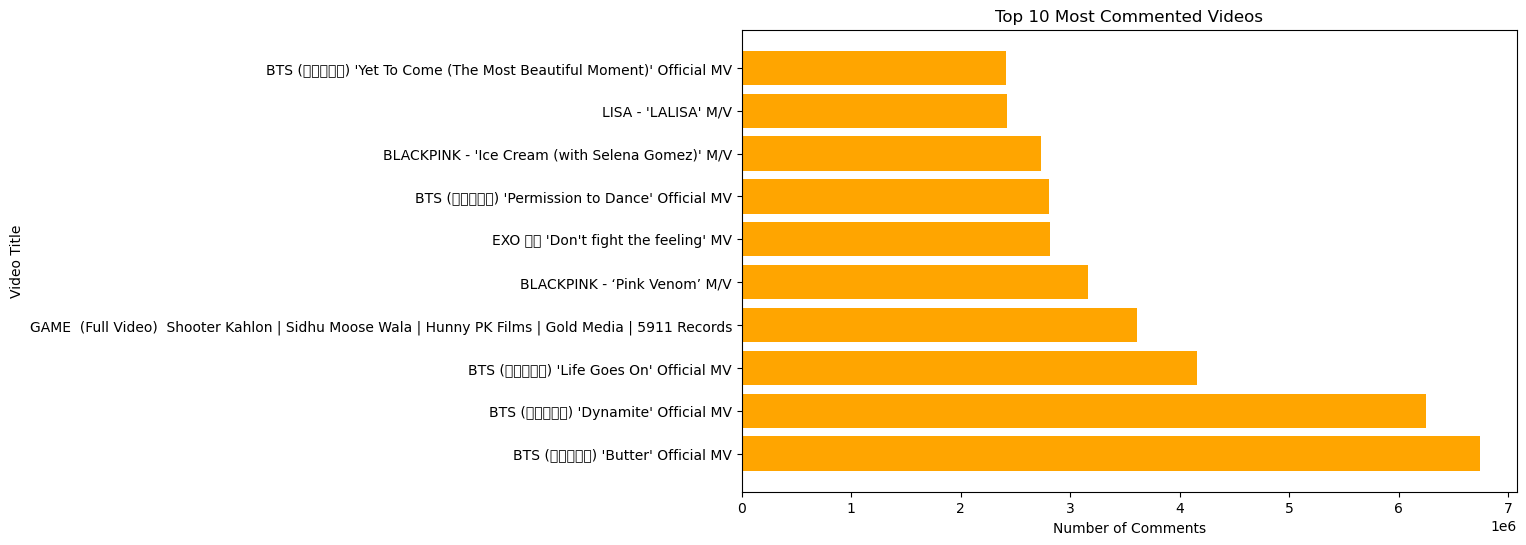

In [35]:
# Top 10 Most Commented Videos

# Sort Dataset by Comments
top_commented = unique_videos.sort_values(by="comment_count",ascending=False).head(10)

# Visualization
plt.figure(figsize=(10,6))
plt.barh(top_commented["title"],top_commented["comment_count"],color="orange")
plt.title("Top 10 Most Commented Videos")
plt.xlabel("Number of Comments")
plt.ylabel("Video Title")
plt.gca().invert_yaxis
plt.show()

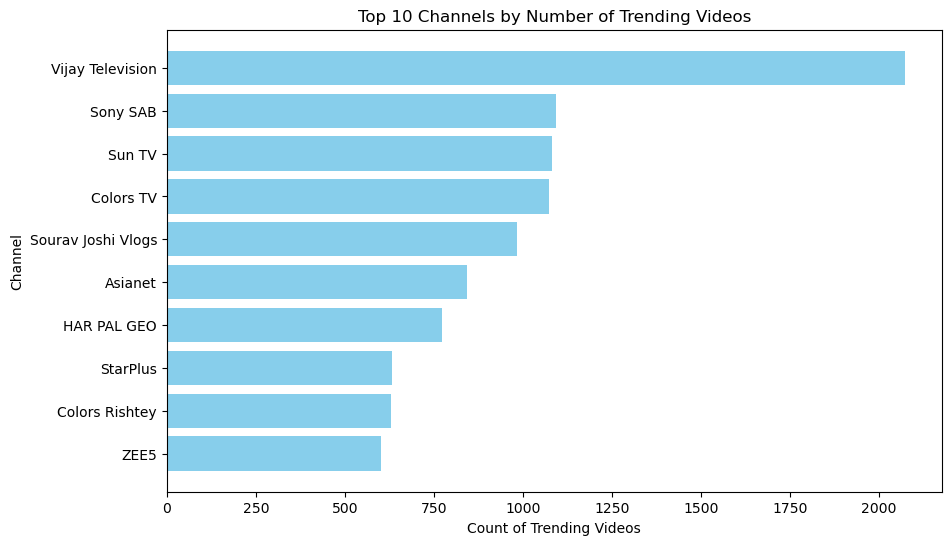

In [19]:
# Top 10 Channel by Number of Trending Videos

# Count how many times each channel appeared in trending
top_channels = df["channelTitle"].value_counts().head(10)

# Visualization
plt.figure(figsize=(10,6))
plt.barh(top_channels.index,top_channels.values, color="skyblue")
plt.title("Top 10 Channels by Number of Trending Videos")
plt.xlabel("Count of Trending Videos")
plt.ylabel("Channel")
plt.gca().invert_yaxis()
plt.show()

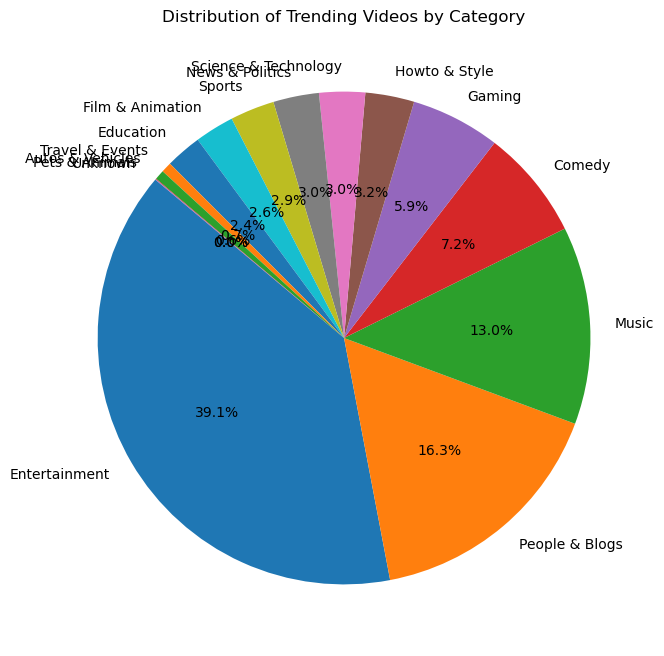

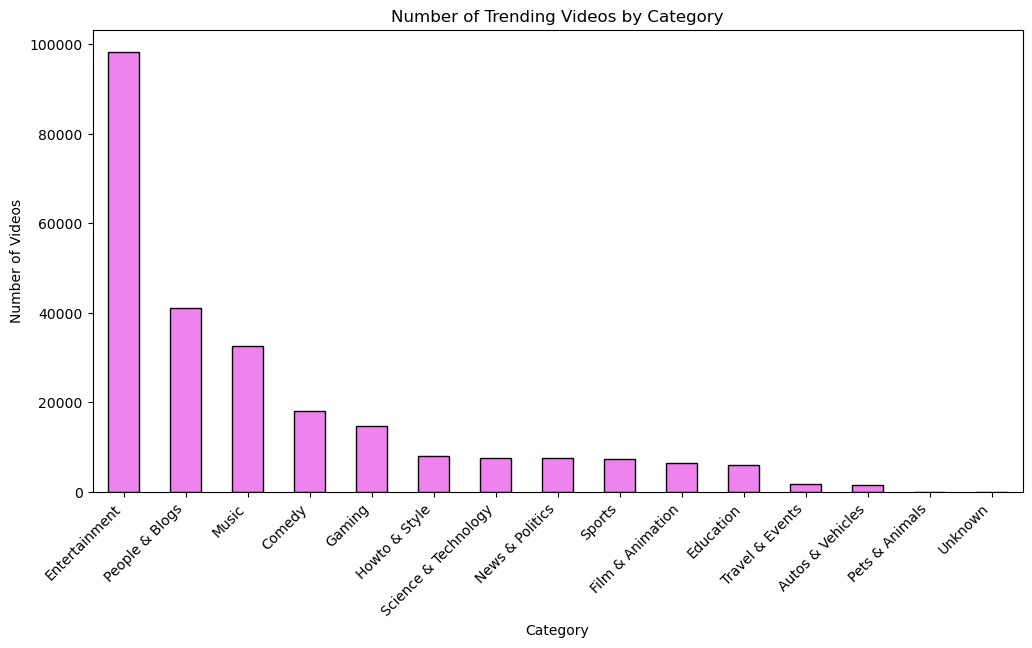

In [17]:
# Number of Videos by Category (Pie Chart + Bar Chart)

# Count number of videos per category
category_counts = df["category_name"].value_counts()

# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(category_counts,labels=category_counts.index,autopct="%1.1f%%",startangle=140)
plt.title("Distribution of Trending Videos by Category")
plt.show()

# Bar Chart
plt.figure(figsize=(12,6))
category_counts.plot(kind="bar",color="violet",edgecolor="black")
plt.title("Number of Trending Videos by Category")
plt.xlabel("Category")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45, ha="right")
plt.show()

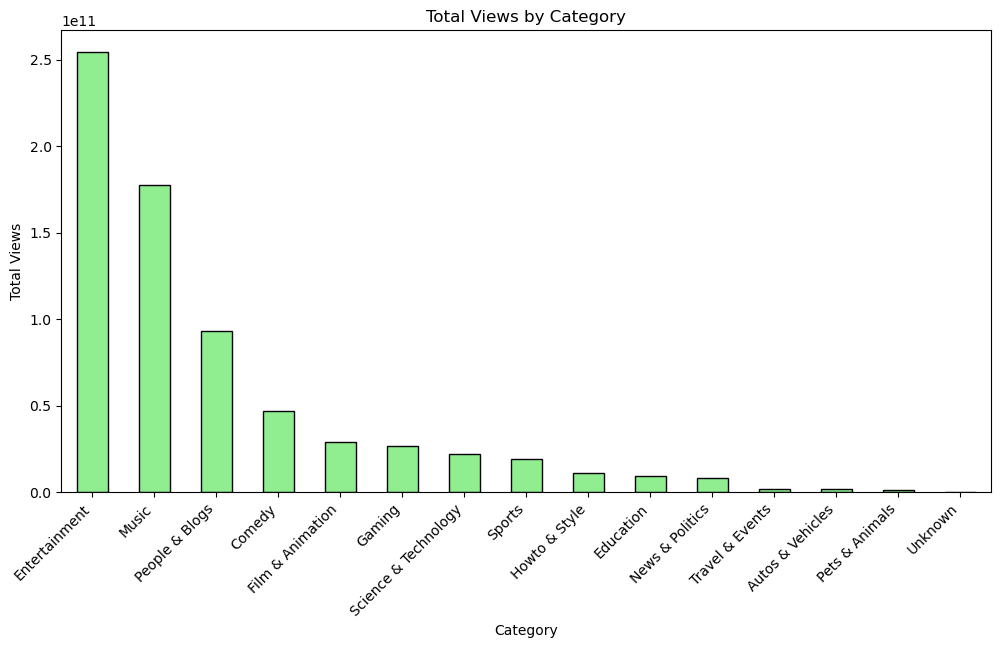

In [19]:
# Total views by category
category_views = df.groupby("category_name")["view_count"].sum().sort_values(ascending=False)

# Bar Chart
plt.figure(figsize=(12,6))
category_views.plot(kind="bar",color="lightgreen",edgecolor="black")
plt.title("Total Views by Category")
plt.xlabel("Category")
plt.ylabel("Total Views")
plt.xticks(rotation=45, ha="right")
plt.show()

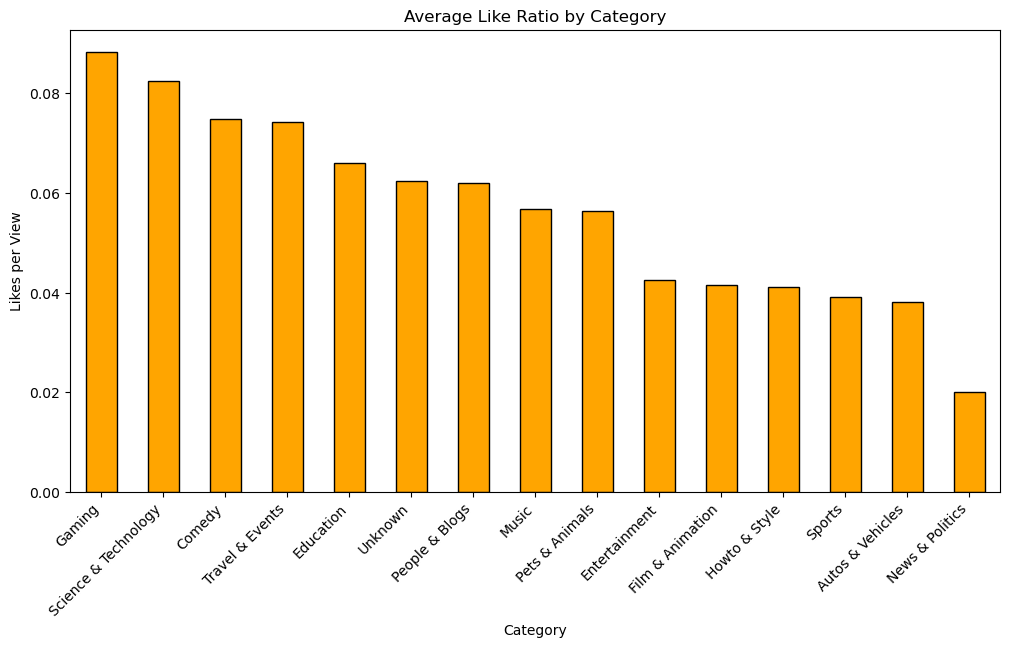

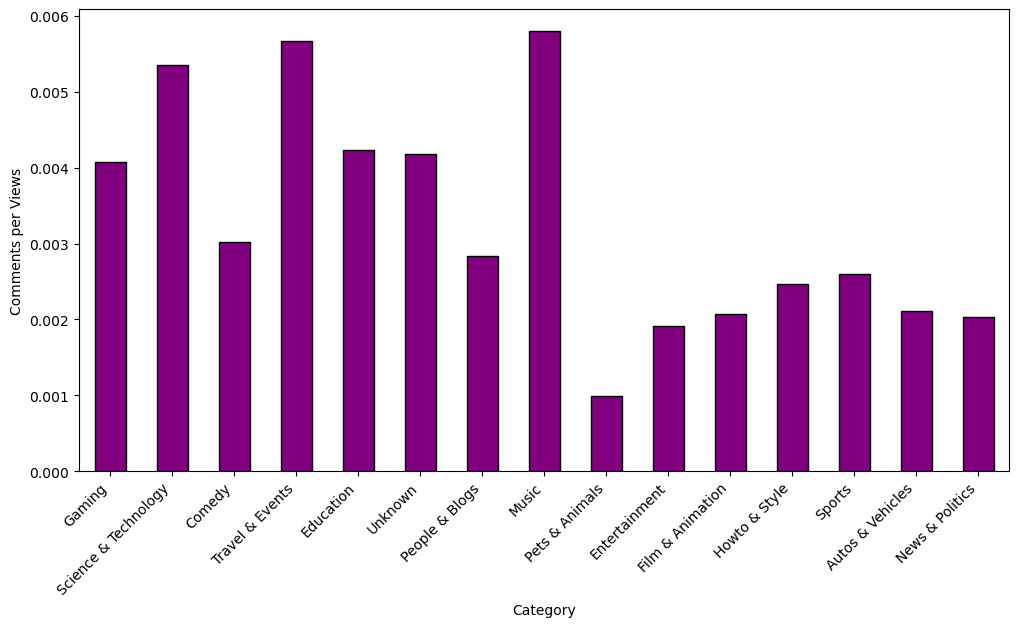

In [22]:
# Engagement Analysis: Calculate like ratio & comment ratio per category and visualiza them

# Create engagement matrics
df["like_ratio"] = df["likes"]/df["view_count"]
df["comment_ratio"] = df["comment_count"]/df["view_count"]

# Average ratios per category
engagement = df.groupby("category_name")[["like_ratio","comment_ratio"]].mean().sort_values("like_ratio",ascending=False)

# Plot like Ratio
plt.figure(figsize=(12,6))
engagement["like_ratio"].plot(kind="bar",color="orange",edgecolor="black")
plt.title("Average Like Ratio by Category")
plt.xlabel("Category")
plt.ylabel("Likes per View")
plt.xticks(rotation=45, ha="right")

# Plot Comment Ratio
plt.figure(figsize=(12,6))
engagement["comment_ratio"].plot(kind="bar",color="purple",edgecolor="black")
plt.xlabel("Category")
plt.ylabel("Comments per Views")
plt.xticks(rotation=45,ha="right")
plt.show()

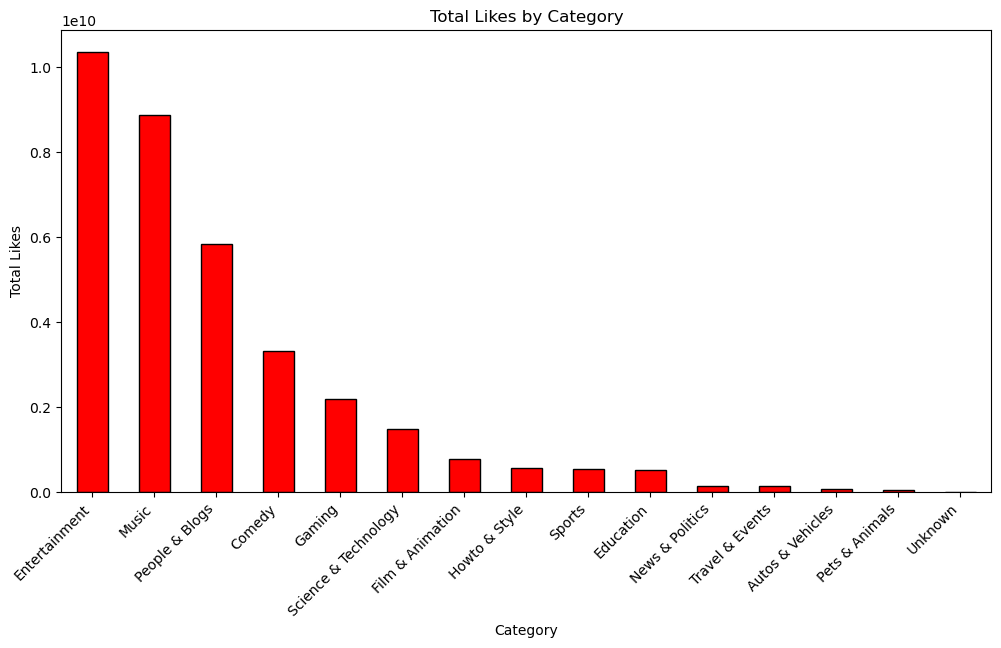

In [24]:
# Total likes by category
category_likes = df.groupby("category_name")["likes"].sum().sort_values(ascending=False)

# Bar Chart
plt.figure(figsize=(12,6))
category_likes.plot(kind="bar",color="red",edgecolor="black")
plt.title("Total Likes by Category")
plt.xlabel("Category")
plt.ylabel("Total Likes")
plt.xticks(rotation=45, ha="right")
plt.show()

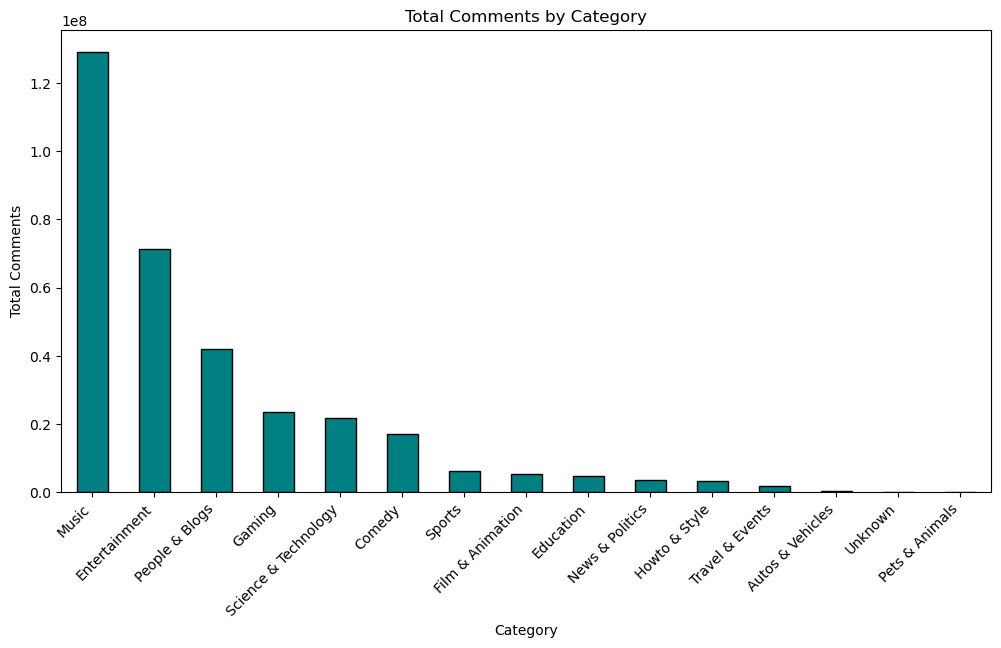

In [15]:
# Total Comments by Category

category_comments = df.groupby("category_name")["comment_count"].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
category_comments.plot(kind="bar",color="teal",edgecolor="black")
plt.title("Total Comments by Category")
plt.xlabel("Category")
plt.ylabel("Total Comments")
plt.xticks(rotation=45, ha="right")
plt.show()

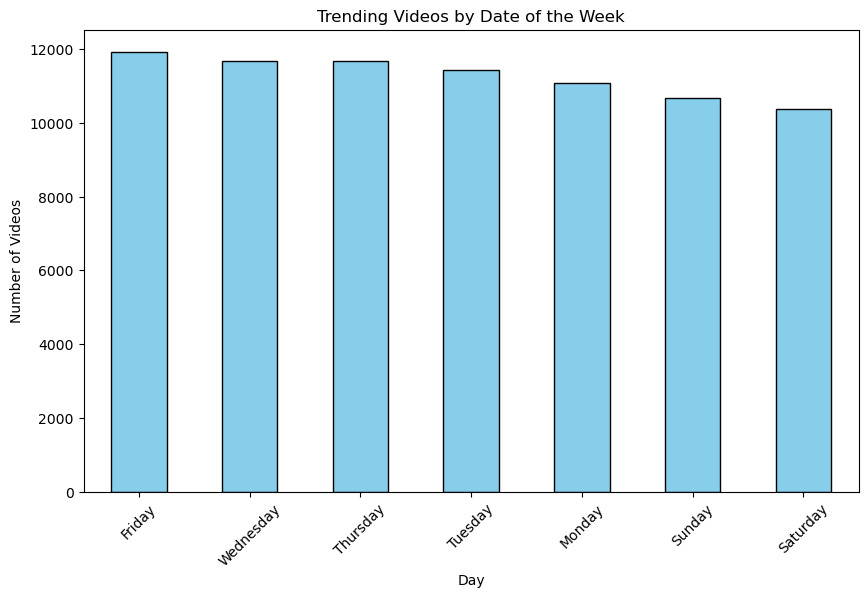

In [17]:
# Trending Videos by Day of the Week

day_counts = df["publish_day"].value_counts()

#Visualization
plt.figure(figsize=(10,6))
day_counts.plot(kind="bar",color="skyblue",edgecolor="black")
plt.title("Trending Videos by Date of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()

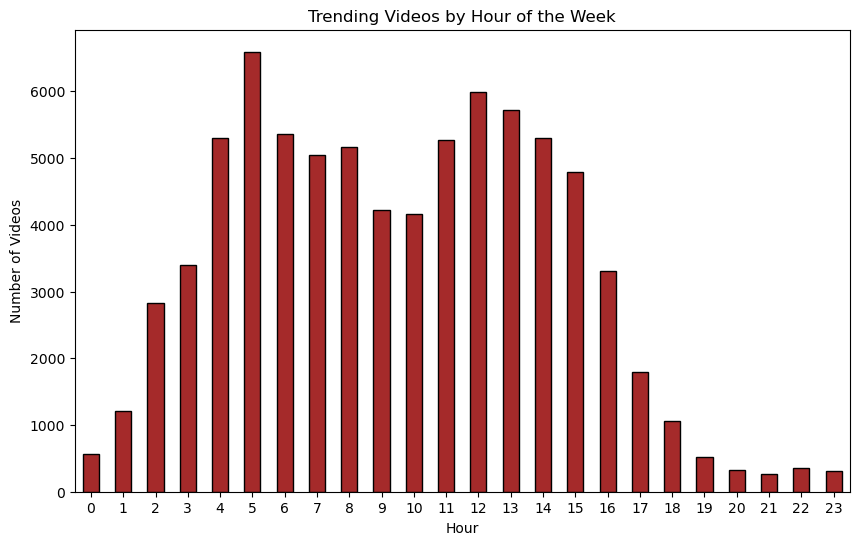

In [21]:
# Trending Videos by Hour of the Week

hour_counts=df["publish_hour"].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10,6))
hour_counts.plot(kind="bar",color="brown",edgecolor="black")
plt.title("Trending Videos by Hour of the Week")
plt.xlabel("Hour")
plt.ylabel("Number of Videos")
plt.xticks(rotation=0)
plt.show()

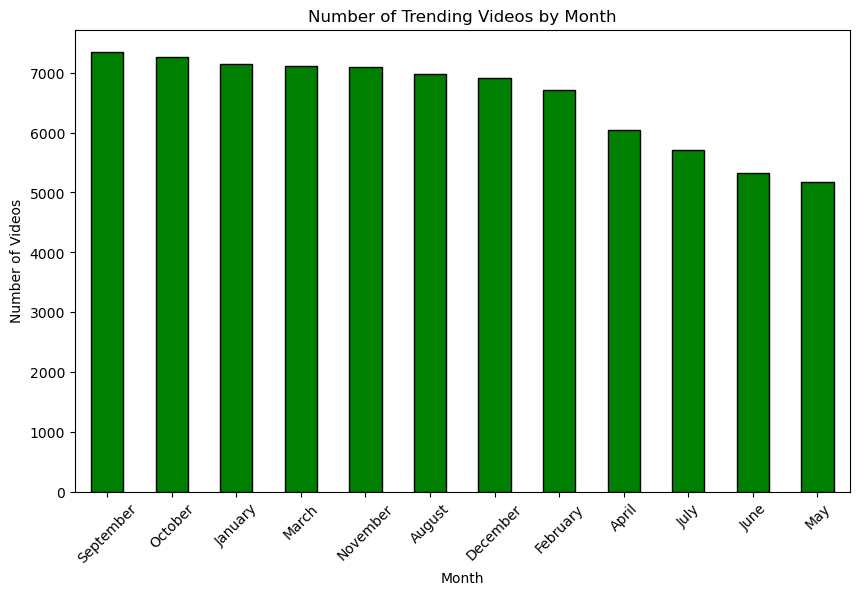

In [26]:
# Trending Videos by Month

month_counts=df["publish_month"].value_counts()

# Visualization
plt.figure(figsize=(10,6))
month_counts.plot(kind="bar",color="green",edgecolor="black")
plt.title("Number of Trending Videos by Month")
plt.xlabel("Month")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()

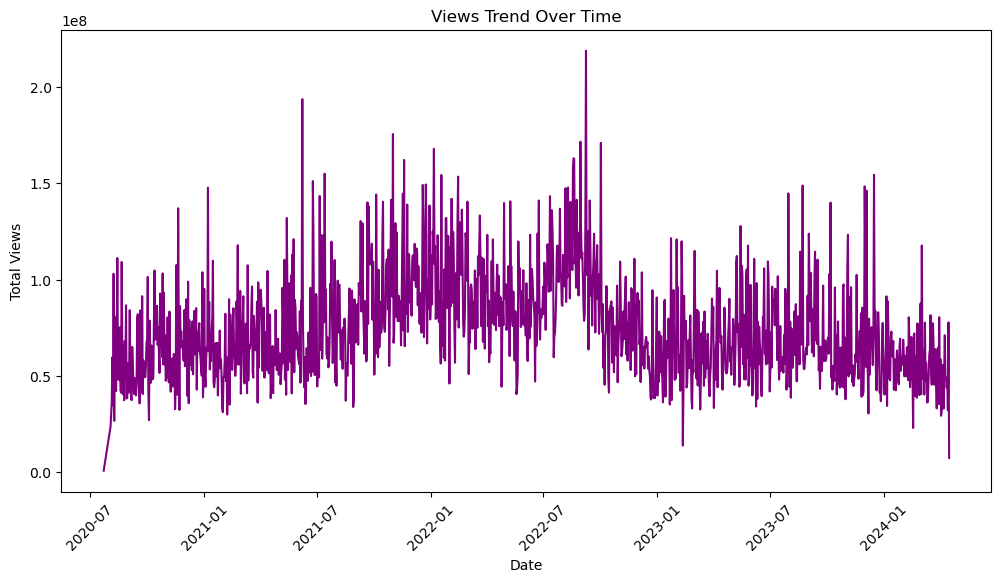

In [40]:
# Trends of Views Over Time

df["publishedAT"] = pd.to_datetime(df["publishedAt"],errors="coerce")

# Aggregate views by date
views_trend = df.groupby(df["publishedAt"].dt.date)["view_count"].sum()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(views_trend.index,views_trend.values,color="purple")
plt.title("Views Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.show()

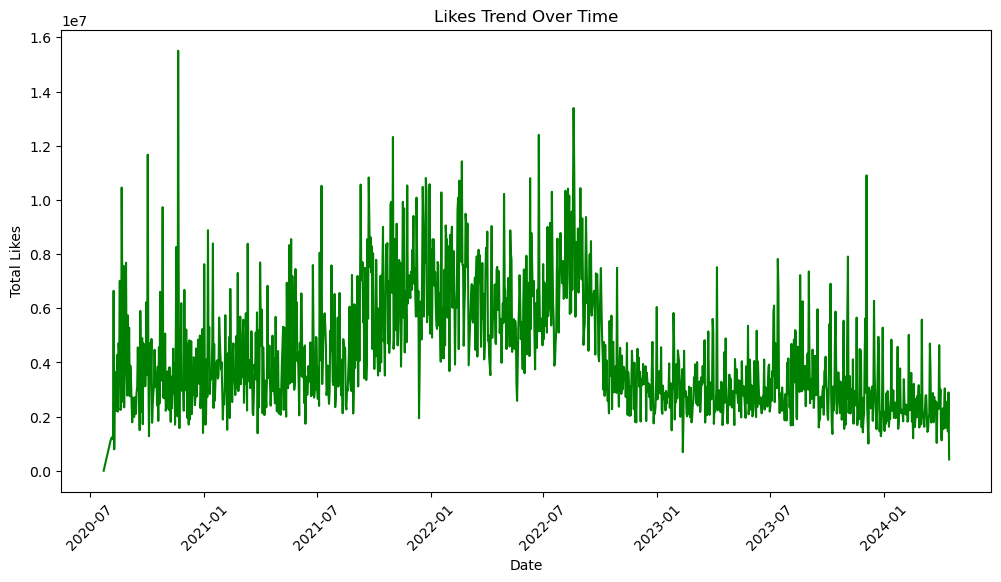

In [34]:
# Trend of Likes Over Time 

likes_trend = df.groupby(df["publishedAt"].dt.date)["likes"].sum()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(likes_trend.index,likes_trend.values, color="green")
plt.title("Likes Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.xticks(rotation=45)
plt.show()

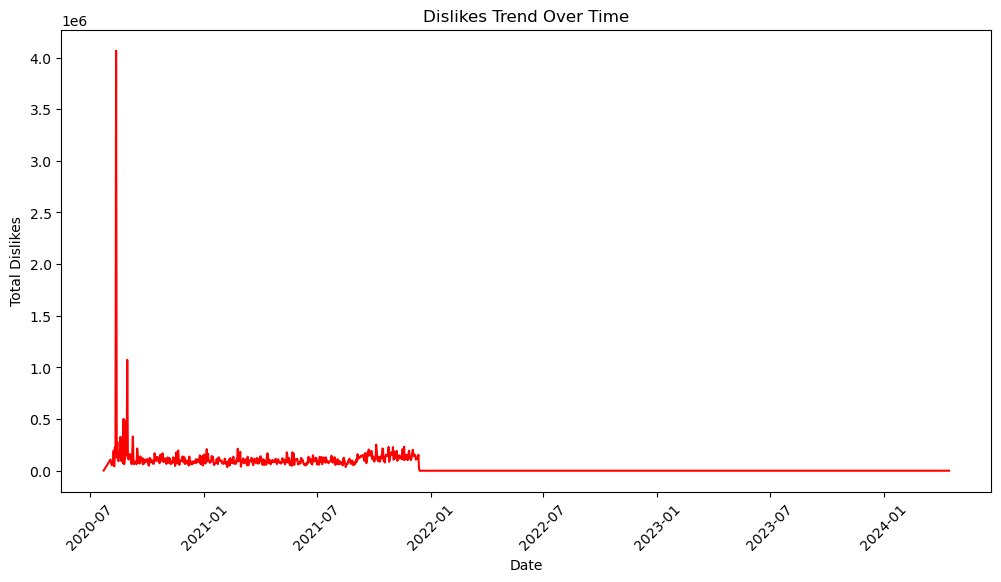

In [39]:
# Trend of Dislikes Over Time

dislikes_trend = df.groupby(df["publishedAt"].dt.date)["dislikes"].sum()

# Visualization
plt.figure(figsize=(12,6))
plt.plot(dislikes_trend.index,dislikes_trend.values, color="red")
plt.title("Dislikes Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Dislikes")
plt.xticks(rotation=45)
plt.show()

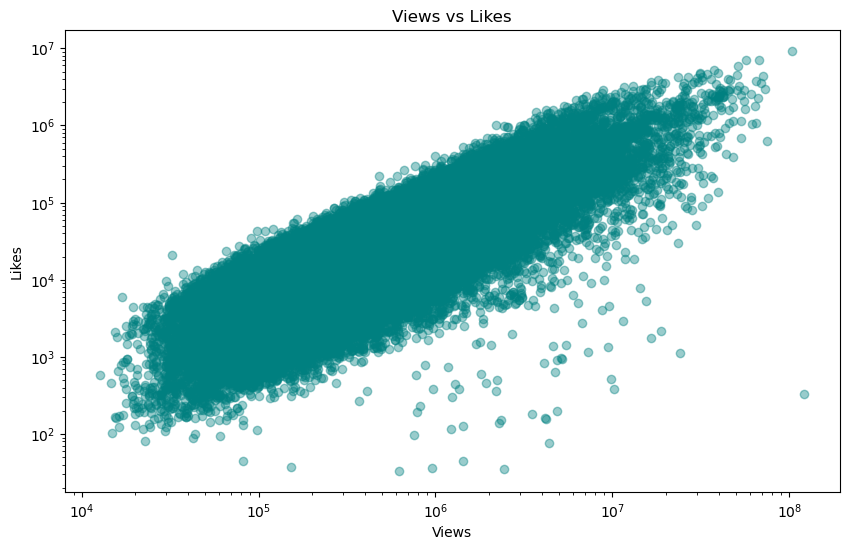

In [41]:
# Views vs Likes

plt.figure(figsize=(10,6))
plt.scatter(df["view_count"],df["likes"],alpha=0.4, color="teal")
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.xscale("log")
plt.yscale("log")
plt.show()

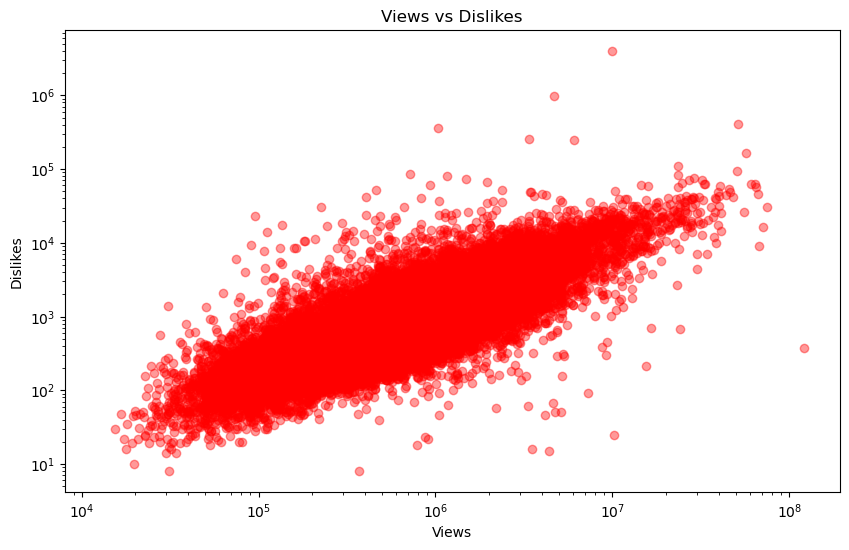

In [43]:
# Views vs Dislikes

plt.figure(figsize=(10,6))
plt.scatter(df["view_count"],df["dislikes"],alpha=0.4, color="red")
plt.title("Views vs Dislikes")
plt.xlabel("Views")
plt.ylabel("Dislikes")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [17]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [19]:
# Connect to SQLite (creates youtube.db file if not exists)
conn = sqlite3.connect("youtube.db")

# Load CSV into Pandas
df = pd.read_csv("IN_youtube_trending_data.csv")

# Push dataframe into SQL table
df.to_sql("youtube_trending",conn,if_exists="replace",index=False)

print("Data loaded into SQLite Successfully!")

Data loaded into SQLite Successfully!


In [20]:
import json

# Load category mapping from JSON
with open("IN_category_id.json","r") as f: # replace with JSON filename
    category_data = json.load(f)

# Extract id, name pairs
categories = []
for item in category_data["items"]:
    cat_id = int(item["id"]) 
    cat_name = item["snippet"]["title"]
    categories.append((cat_id, cat_name))


In [21]:
# Create Table in SQLite

conn.execute("""
CREATE TABLE IF NOT EXISTS
video_categories (
categoryId INT PRIMARY KEY,
category_name TEXT
);
""")

In [39]:
# Insert Values into Table
conn.executemany("INSERT OR REPLACE INTO video_categories VALUES (?,?);", categories)
conn.commit()
print("Categories inserted into SQL table successfully")

Categories inserted into SQL table successfully


In [22]:
# SQL query: Top 10 channels by total views per category

query = """
SELECT channeltitle, SUM(view_count) AS total_views
FROM youtube_trending
GROUP BY channeltitle
ORDER BY total_views DESC
LIMIT 10;
"""

# Run the query and load into pandas
df_sql = pd.read_sql_query(query,conn)

# Show Results
print(df_sql)

         channelTitle  total_views
0            T-Series  26997737316
1             MrBeast  15748817791
2  Sourav Joshi Vlogs  11761288222
3         HAR PAL GEO  11403761002
4           BLACKPINK   8739144105
5      ARY Digital HD   8293526826
6   Zee Music Company   8092466759
7         HYBE LABELS   7392670685
8    Vijay Television   7384835859
9    Dushyant kukreja   6517705756


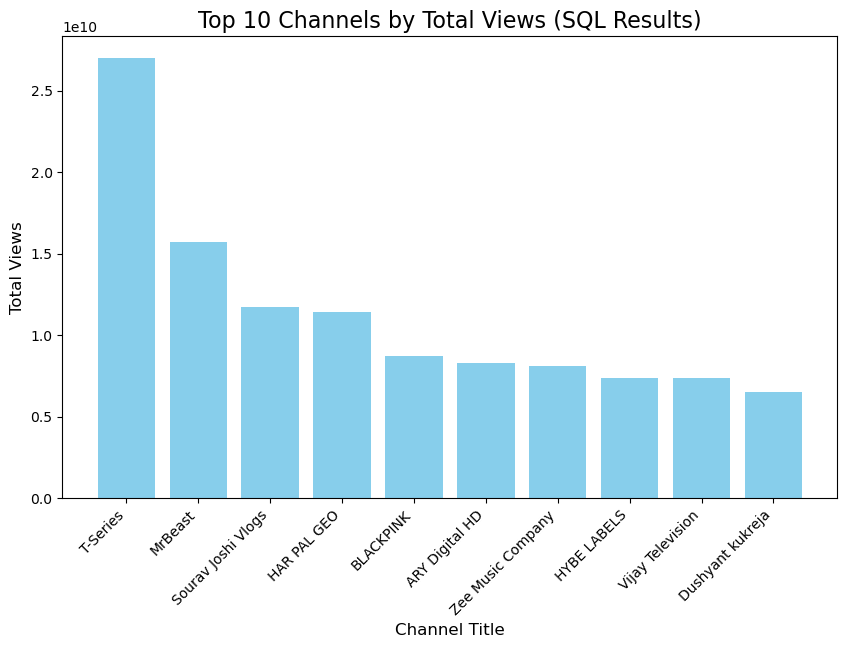

In [20]:
# Visualization of SQL Results

plt.figure(figsize=(10,6))
plt.bar(df_sql["channelTitle"],df_sql["total_views"], color="skyblue")
plt.title("Top 10 Channels by Total Views (SQL Results)",fontsize=16)
plt.xlabel("Channel Title",fontsize=12)
plt.ylabel("Total Views",fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

In [41]:
# SQL Query: Average Views per Category 
query = """
SELECT C.category_name, AVG(V.view_count) AS avg_views
FROM youtube_trending AS V
JOIN video_categories AS C
ON V.categoryId = C.categoryId
GROUP BY category_name
ORDER BY avg_views DESC;
"""
# Run the query and load into Pandas
df_avg_views = pd.read_sql_query(query,conn)

# Show Results
print(df_avg_views.head())

          category_name     avg_views
0        Pets & Animals  9.188948e+06
1                 Music  5.450439e+06
2      Film & Animation  4.421432e+06
3  Science & Technology  2.933895e+06
4         Entertainment  2.589086e+06


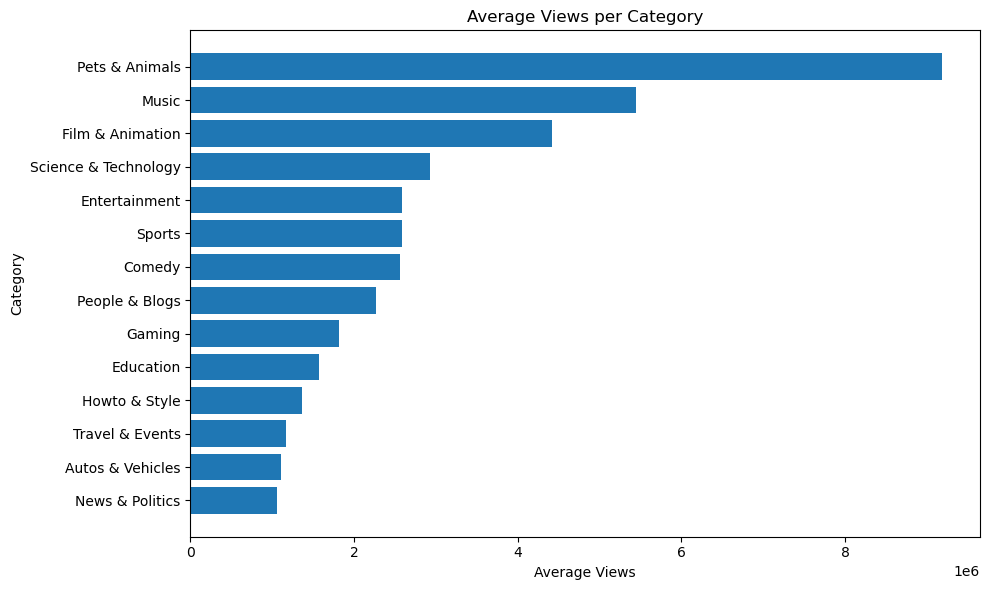

In [42]:
# Visualization of SQL Results
plt.figure(figsize=(10,6))
plt.barh(df_avg_views["category_name"],df_avg_views["avg_views"])
plt.title("Average Views per Category")
plt.xlabel("Average Views")
plt.ylabel("Category")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [43]:
# SQL Query: Top 5 categories by number of trending videos

query = """
SELECT C.category_name, COUNT(*) AS trending_videos
FROM youtube_trending AS V
JOIN video_categories AS C
ON V.categoryId = C.categoryId
GROUP BY C.category_name
ORDER BY trending_videos DESC
LIMIT 5;
"""

# Run query and load into pandas
df_top_categories = pd.read_sql_query(query, conn)

# Show result
print(df_top_categories)

    category_name  trending_videos
0   Entertainment            98264
1  People & Blogs            41079
2           Music            32609
3          Comedy            18155
4          Gaming            14735


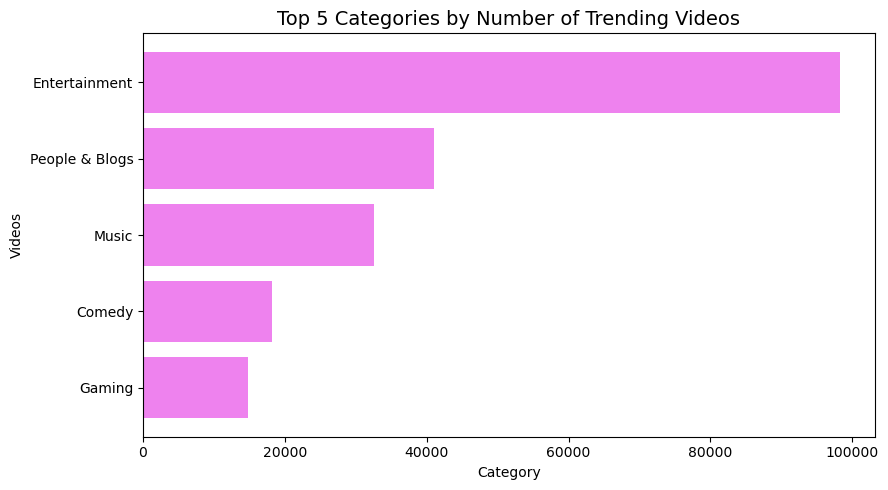

In [44]:
# Visualization of SQL Results

plt.figure(figsize=(9,5))
plt.barh(df_top_categories["category_name"],df_top_categories["trending_videos"], color="violet")
plt.title("Top 5 Categories by Number of Trending Videos",fontsize=14)
plt.xlabel("Category")
plt.ylabel("Videos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [45]:
# 2. Channel-level Analysis
# Top 10 Channels by Total Views
# SQL Query

query = """
SELECT channelTitle, SUM(view_count) AS total_views
FROM youtube_trending
GROUP BY channelTitle
ORDER BY total_views DESC
LIMIT 10;
"""

df_top_channel_views = pd.read_sql(query,conn)

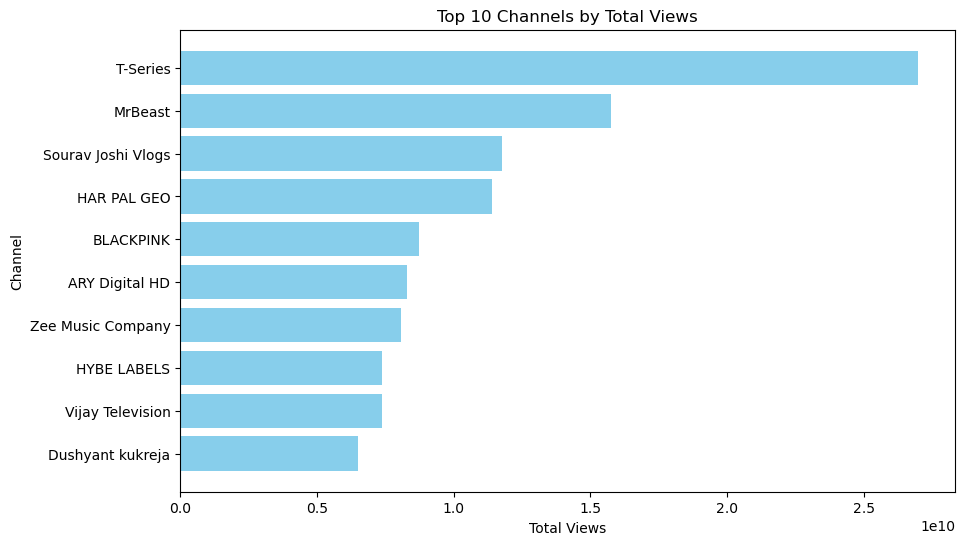

In [46]:
# Visualization of SQL Results

plt.figure(figsize=(10,6))
plt.barh(df_top_channel_views["channelTitle"],df_top_channel_views["total_views"],color="skyblue")
plt.title("Top 10 Channels by Total Views")
plt.xlabel("Total Views")
plt.ylabel("Channel")
plt.gca().invert_yaxis()
plt.show()

In [29]:
# Top 10 Channels by Number of Trending Videos
# SQL Query
query = """
SELECT channelTitle, COUNT(*) AS trending_videos
FROM youtube_trending
GROUP BY channelTitle
ORDER BY trending_videos DESC
LIMIT 10;
"""
df_top_channels_trending = pd.read_sql(query,conn)

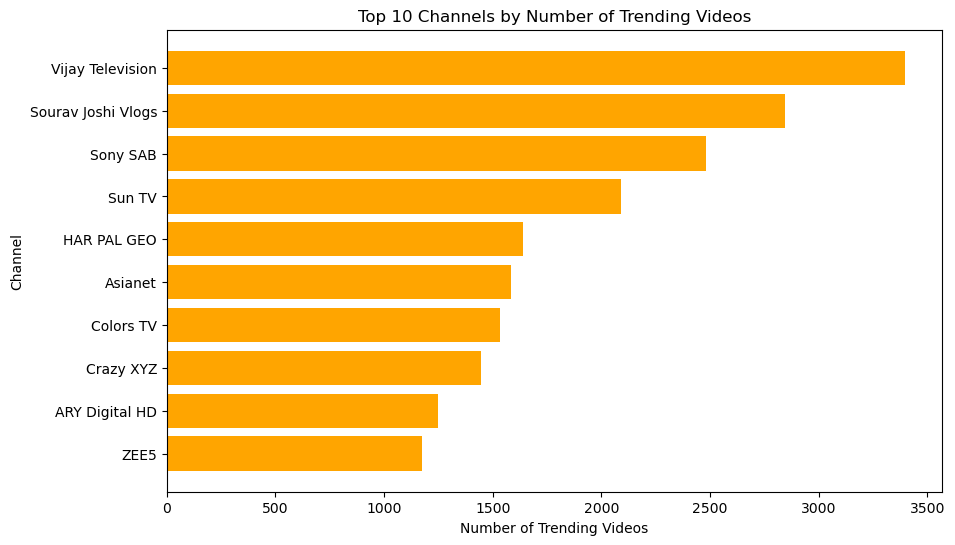

In [30]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_top_channels_trending["channelTitle"],df_top_channels_trending["trending_videos"], color="orange")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.title("Top 10 Channels by Number of Trending Videos")
plt.gca().invert_yaxis()
plt.show()

In [31]:
# Average Views per Video for Each Channel (SQL Query)
query = """
SELECT channelTitle, AVG(view_count) AS avg_views
FROM youtube_trending
GROUP BY channelTitle
ORDER BY avg_views DESC
LIMIT 10;
"""
df_avg_views_channel = pd.read_sql(query,conn)

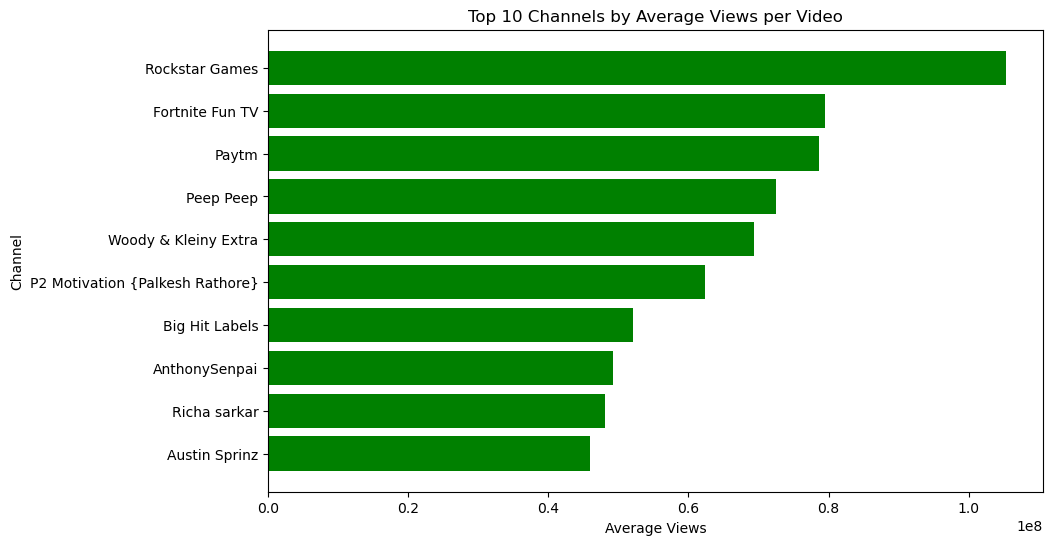

In [32]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_avg_views_channel["channelTitle"],df_avg_views_channel["avg_views"],color="green")
plt.title("Top 10 Channels by Average Views per Video")
plt.xlabel("Average Views")
plt.ylabel("Channel")
plt.gca().invert_yaxis()
plt.show()

In [58]:
# Video-level Analysis 
# Top 10 Most Liked Videos (SQL Query)
query = """
SELECT title, MAX(likes) AS max_likes
FROM youtube_trending
WHERE likes IS NOT NULL
GROUP BY title 
ORDER BY max_likes DESC
LIMIT 10;
"""
df_most_liked = pd.read_sql(query,conn)

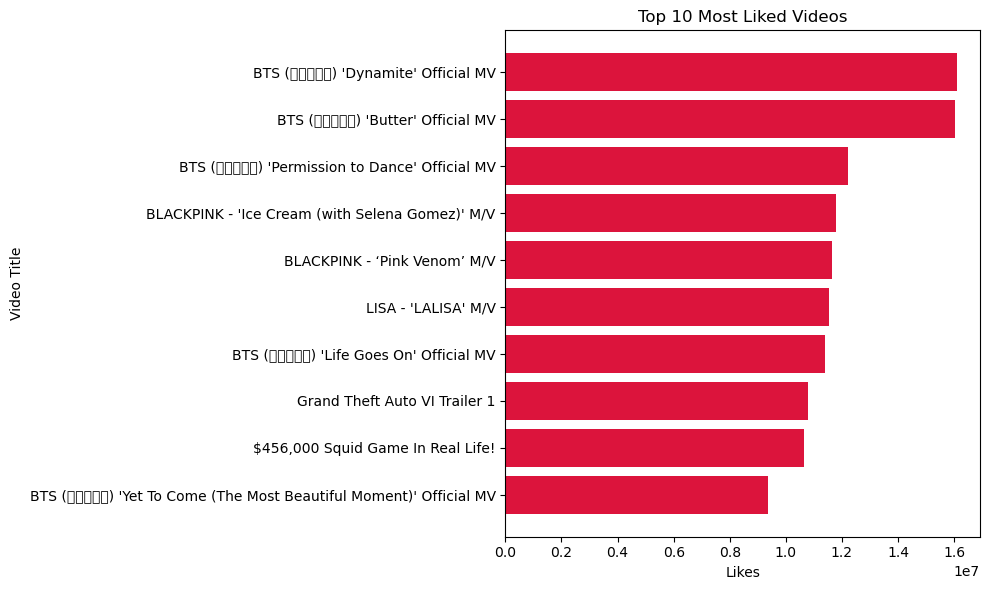

In [61]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_most_liked["title"],df_most_liked["max_likes"],color="crimson")
plt.xlabel("Likes")
plt.ylabel("Video Title")
plt.title("Top 10 Most Liked Videos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [64]:
# Most Disliked Videos (SQL Query)
query = """
SELECT title, MAX(dislikes) AS max_dislikes
FROM youtube_trending
WHERE dislikes IS NOT NULL
GROUP BY title
ORDER BY max_dislikes DESC
LIMIT 10;
"""
df_most_disliked = pd.read_sql(query,conn)

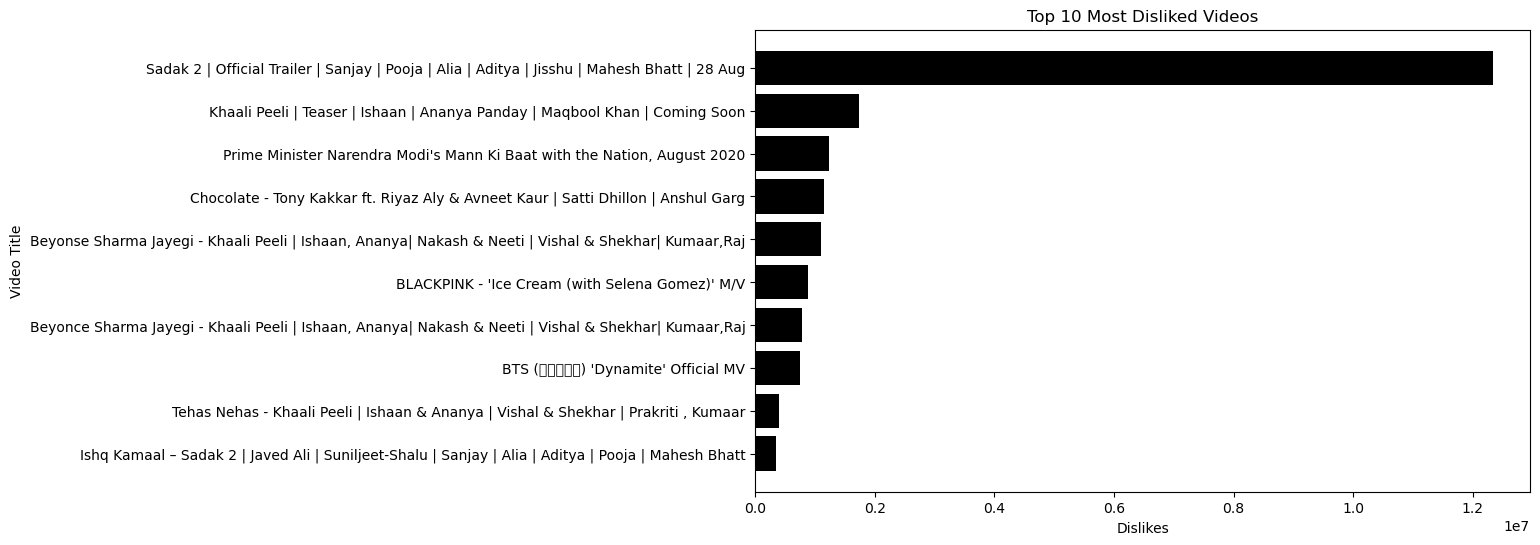

In [66]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_most_disliked["title"],df_most_disliked["max_dislikes"], color="black")
plt.xlabel("Dislikes")
plt.ylabel("Video Title")
plt.title("Top 10 Most Disliked Videos")
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Most Commented Videos (SQL Query)
query = """
SELECT title, MAX(comment_count) AS max_comments
FROM youtube_trending
WHERE comment_count IS NOT NULL
GROUP BY title
ORDER BY max_comments DESC
LIMIT 10;
"""
df_most_commented = pd.read_sql(query,conn)

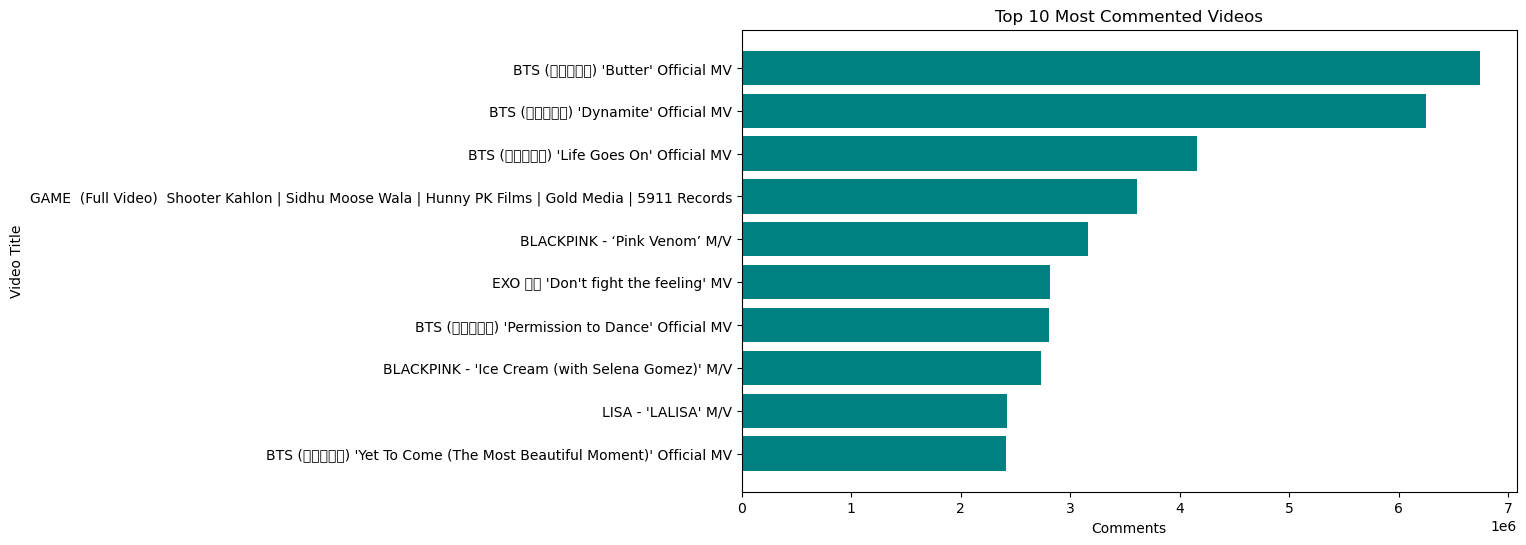

In [22]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_most_commented["title"],df_most_commented["max_comments"], color="teal")
plt.xlabel("Comments")
plt.ylabel("Video Title")
plt.title("Top 10 Most Commented Videos")
plt.gca().invert_yaxis()
plt.show()

In [27]:
# Best Like-to-Dislike Ratio Videos (SQL Query)

query = """
SELECT title,
       MAX(likes) AS likes,
       MAX(dislikes) AS dislikes,
       CAST(MAX(likes) AS FLOAT) /
NULLIF(MAX(dislikes),0) AS ratio
FROM youtube_trending
WHERE dislikes IS NOT NULL AND dislikes > 0
GROUP BY title
ORDER BY ratio DESC
LIMIT 10;
"""
df_best_ratio = pd.read_sql(query, conn)

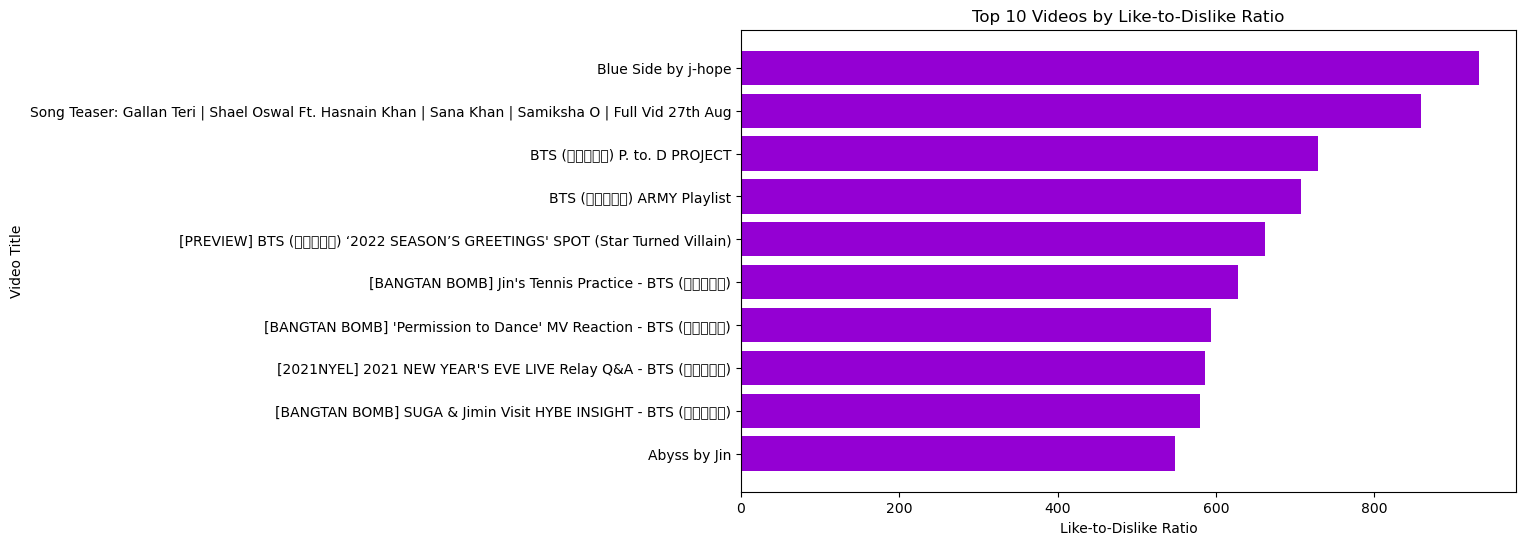

In [29]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.barh(df_best_ratio["title"],df_best_ratio["ratio"], color="darkviolet")
plt.xlabel("Like-to-Dislike Ratio")
plt.ylabel("Video Title")
plt.title("Top 10 Videos by Like-to-Dislike Ratio")
plt.gca().invert_yaxis()
plt.show()

In [36]:
# 4. Time Based Analysis
# Trending Videos by Month

query = """
SELECT strftime("%m", trending_date) AS month,COUNT(*) AS trending_videos
FROM youtube_trending
GROUP BY month
ORDER BY month;
"""
df_trending_month = pd.read_sql(query,conn)

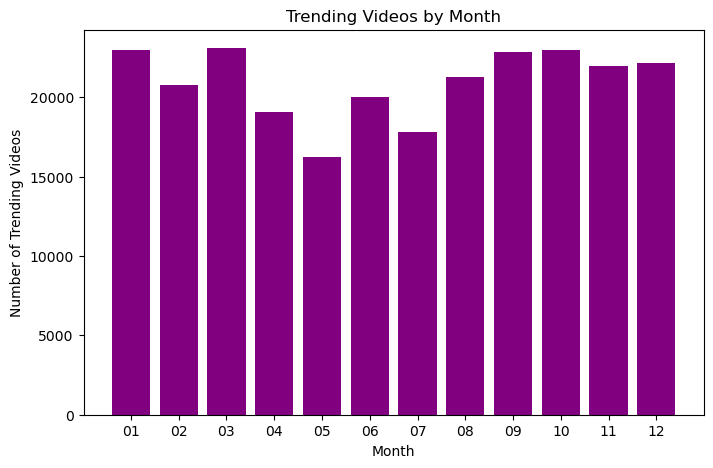

In [37]:
# Visualization of SQL Query
plt.figure(figsize=(8,5))
plt.bar(df_trending_month["month"],df_trending_month["trending_videos"], color="purple")
plt.xlabel("Month")
plt.ylabel("Number of Trending Videos")
plt.title("Trending Videos by Month")
plt.show()

In [42]:
# Trending Videos by Day of Week (SQL Query)

query = """
SELECT strftime("%w", trending_date) AS weekday, COUNT(*) AS trending_videos
FROM youtube_trending
GROUP BY weekday
ORDER BY weekday;
"""
df_trending_weekday = pd.read_sql(query,conn)

# Map Weekly numbers to names
weekday_map = {
    "0": "Sunday", "1":"Monday", "2":"Tuesday","3":"Wednesday","4":"Thursday","5":"Friday","6":"Saturday"
}
df_trending_weekday["weekday"] = df_trending_weekday["weekday"].map(weekday_map)

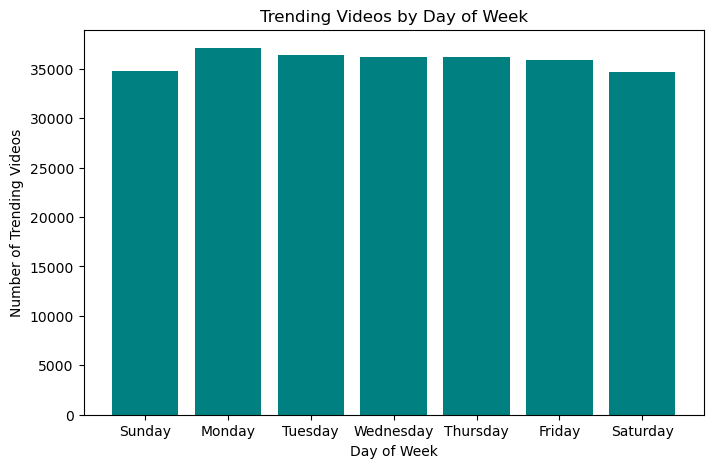

In [43]:
# Visualization of SQL query
plt.figure(figsize=(8,5))
plt.bar(df_trending_weekday["weekday"],df_trending_weekday["trending_videos"], color="teal")
plt.title("Trending Videos by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trending Videos")
plt.show()

In [47]:
# Trending Videos by Hour of Day (SQL Query)

query = """
SELECT strftime("%H", publishedAt) AS hour, COUNT(*) AS trending_videos
FROM youtube_trending
GROUP BY hour
ORDER BY hour;
"""
df_trending_hour = pd.read_sql(query,conn)

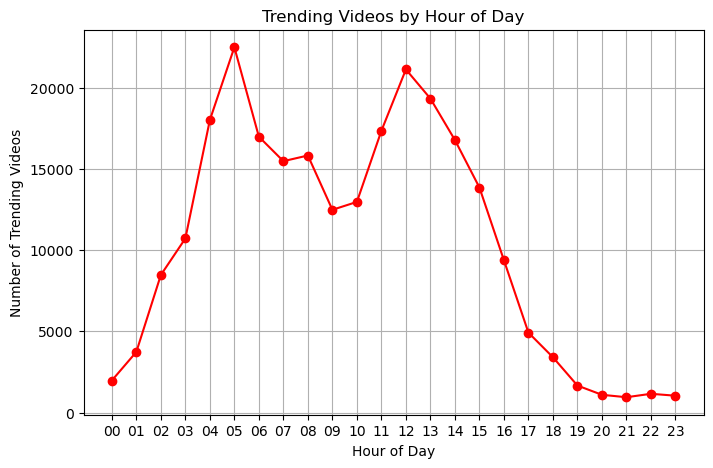

In [50]:
# Visualization of SQL Query
plt.figure(figsize=(8,5))
plt.plot(df_trending_hour["hour"],df_trending_hour["trending_videos"],marker="o",color="red")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trending Videos")
plt.title("Trending Videos by Hour of Day")
plt.grid(True)
plt.show()

In [49]:
# 5. Engagement Level Analysis
# Top 10 Most Engaging Categories
query = """
SELECT categoryId,
       SUM(likes) AS total_likes,
       SUM(dislikes) AS total_dislikes,
       SUM(comment_count) AS total_comments,
       SUM(likes + dislikes + comment_count) AS total_engagement
FROM youtube_trending
GROUP BY categoryId
ORDER BY total_engagement DESC
LIMIT 10;
"""
df_category_engagement = pd.read_sql(query, conn)

# Map IDs -> Names
df_category_engagement["category_name"] = df_category_engagement["categoryId"].map(category_mapping)

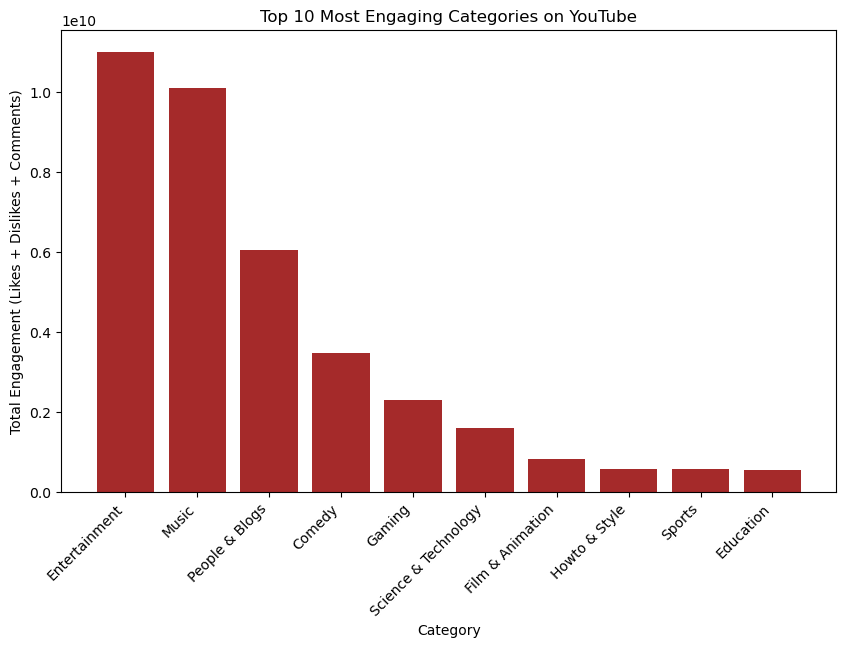

In [52]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))
plt.bar(df_category_engagement["category_name"],df_category_engagement["total_engagement"], color="brown")
plt.xlabel("Category")
plt.ylabel("Total Engagement (Likes + Dislikes + Comments)")
plt.title("Top 10 Most Engaging Categories on YouTube")
plt.xticks(rotation=45, ha="right")
plt.show()

In [26]:
# Average Likes, Dislikes, Comments per Category
query = """
SELECT categoryId,
       AVG(likes) AS avg_likes,
       AVG(dislikes) AS avg_dislikes,
       AVG(comment_count) AS avg_comments
FROM youtube_trending
GROUP BY categoryId
ORDER BY avg_likes DESC;
"""
df_avg_engagement = pd.read_sql(query,conn)

# Map IDs to names
df_avg_engagement["categoryId"] = df_avg_engagement["categoryId"].astype(int)
df_avg_engagement["category_name"] = df_avg_engagement["categoryId"].map(category_mapping)

# Handle NAN
df_avg_engagement ["category_name"] = df_avg_engagement["category_name"].fillna("Unknown")

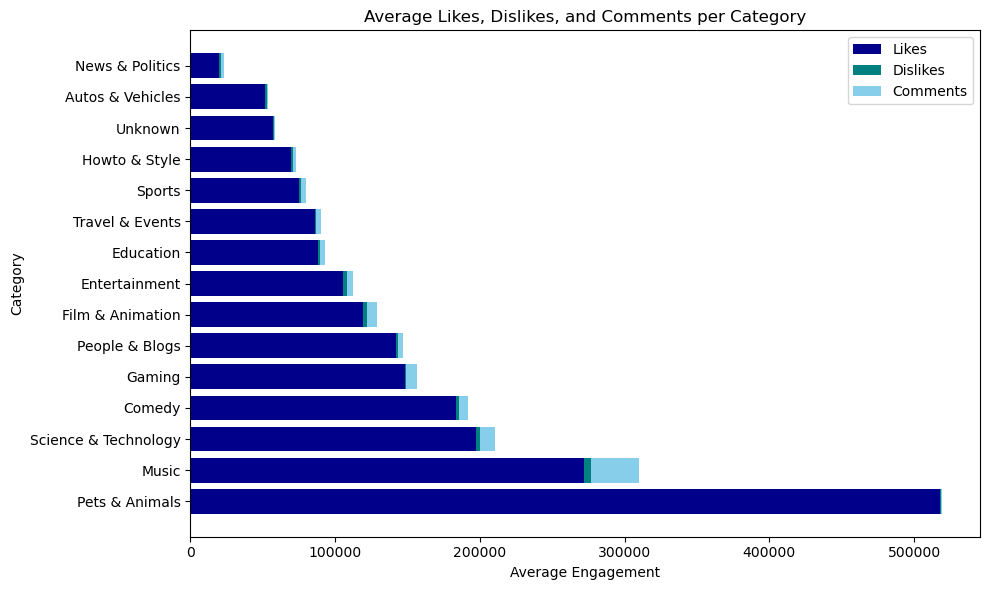

In [29]:
# Visualization of SQL Query
plt.figure(figsize=(10,6))

# Define Variables for Clarity
categories  = df_avg_engagement["category_name"]
likes = df_avg_engagement["avg_likes"]
dislikes = df_avg_engagement["avg_dislikes"]
comments = df_avg_engagement["avg_comments"]

# First bar: Likes
plt.barh(df_avg_engagement["category_name"],df_avg_engagement["avg_likes"], color="darkblue", label="Likes")

# Second bar: Dislikes, Stacked on Likes
plt.barh(df_avg_engagement["category_name"], df_avg_engagement["avg_dislikes"], color="teal",left=df_avg_engagement["avg_likes"],label="Dislikes")

# Third bar: Comments, Stacked on Likes + Dislikes
plt.barh(df_avg_engagement["category_name"],df_avg_engagement["avg_comments"], color="skyblue",left=(df_avg_engagement["avg_likes"]+df_avg_engagement
         ["avg_dislikes"]), label="Comments")

plt.xlabel("Average Engagement")
plt.ylabel("Category")
plt.title("Average Likes, Dislikes, and Comments per Category")
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
# Correlation between views and likes
query = """
SELECT view_count, likes
FROM youtube_trending
WHERE view_count IS NOT NULL AND likes IS NOT NULL;
"""
df_views_likes = pd.read_sql(query, conn)

Correlation between Views and Likes


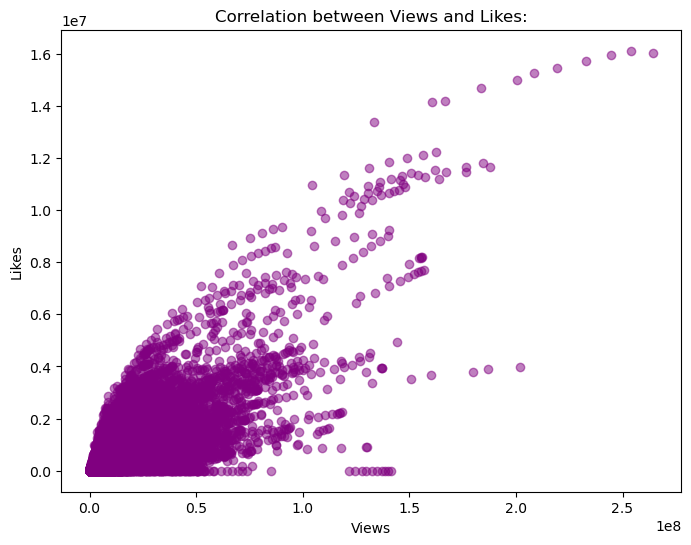

In [36]:
# Visualization of SQL Query
plt.figure(figsize=(8,6))
plt.scatter(df_views_likes["view_count"],df_views_likes["likes"], alpha=0.5, color="purple")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Correlation between Views and Likes:")

# Calculate Correlation coefficient
corr_vl = df_views_likes["view_count"].corr(df_views_likes["likes"])
print("Correlation between Views and Likes")
plt.show()

In [40]:
# Correlation between Views and Comments (SQL Query)
query = """
SELECT view_count, comment_count
FROM youtube_trending
WHERE view_count IS NOT NULL AND comment_count IS NOT NULL;
"""
df_views_comments = pd.read_sql(query, conn)

Correlation between Views and Comments: 0.4580012598707986


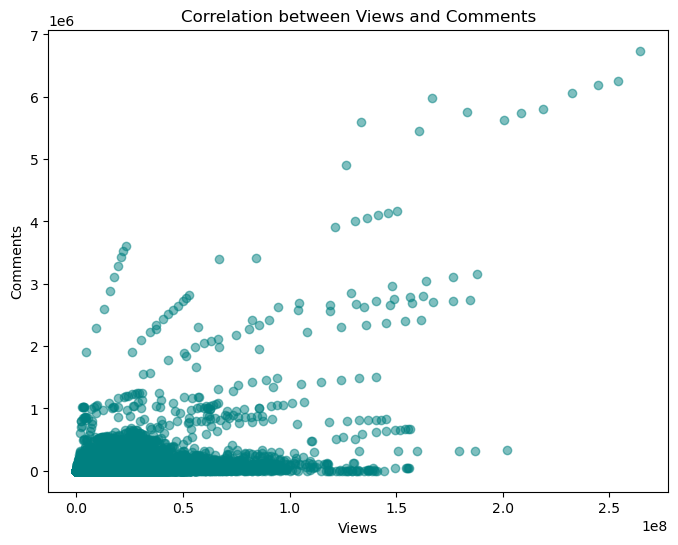

In [44]:
# Visualization of SQL Query
plt.figure(figsize=(8,6))
plt.scatter(df_views_comments["view_count"],df_views_comments["comment_count"], alpha=0.5, color="teal")
plt.xlabel("Views")
plt.ylabel("Comments")
plt.title("Correlation between Views and Comments")

# Calculate correlation coefficient
corr_vc = df_views_comments["view_count"].corr(df_views_comments["comment_count"])
print("Correlation between Views and Comments:", corr_vc)
plt.show()

In [46]:
# Correlation Heatmap (Views,Likes,Dislikes,Comments) (SQL Query)
query = """
SELECT view_count, likes, dislikes, comment_count
FROM youtube_trending
WHERE view_count IS NOT NULL
AND Likes IS NOT NULL
AND dislikes IS NOT NULL
AND comment_count IS NOT NULL;
"""
df_engagement = pd.read_sql(query, conn)

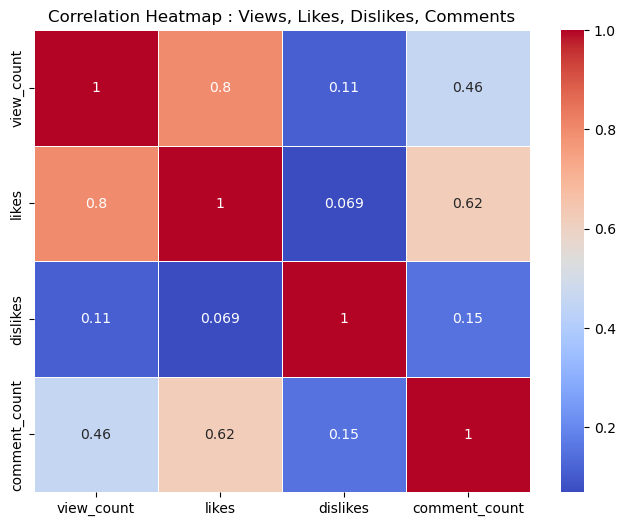

In [49]:
# Visualization of SQL Query
corr_matrix = df_engagement.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap : Views, Likes, Dislikes, Comments")
plt.show()

In [1]:
print("Analysis Complete")

Analysis Complete


In [9]:
# Export Cleaned Data for Power BI
df.to_csv("youtube_trending_cleaned.csv",index=False)